In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(0, 1, 100)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#生成多项式特征
poly = PolynomialFeatures(degree=2)

poly.fit(X)
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [7]:
from sklearn.linear_model import LinearRegression
    
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

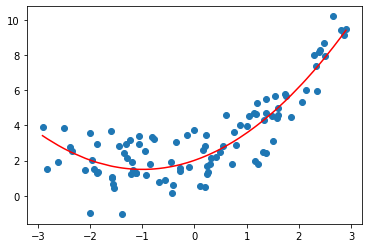

In [8]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color = 'r')
plt.show()

### 关于PolynomialFeayures

In [9]:
X = np.arange(1, 11).reshape(-1, 2)

In [10]:
X.shape

(5, 2)

In [11]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [12]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [13]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

1.将数据转换成多项式特征  
2.特征次数太高的话，需要进行数据归一化  
3.线性回归  
Pipeline可以将三步一起执行

In [16]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(0, 1, 100)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#构造Pipeline传入的参数是一个元组列表，每一个元组对应一个步骤，元组的第一个元素是步骤的名称，第二个元素是
#使用的函数方法。
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree = 2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [18]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

sklearn中并没有多项式回归这个类，所以使用pipeline

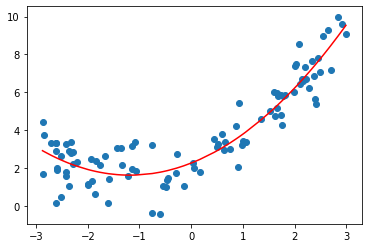

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')
plt.show()